In [ ]:
# Task: Using Langchain built a translation program that translates a given text from one language to another for e.g English to Urdu
# Ali Mehdi Code

from langchain.chat_models import ChatOpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

translation_prompt = PromptTemplate(
    input_variables=["text", "source_language", "target_language"],
    template="Translate the following {source_language} text to {target_language}:\n\n{text}"
)
llm = ChatOpenAI( model="qwen3-1.7b",
      base_url="http://127.0.0.1:1234/v1", 
      api_key="lm-studio",
      temperature=0.7,
      max_completion_tokens=8000
)
translation_chain = LLMChain(llm=llm, prompt=translation_prompt)

def translate_text(text, source_language, target_language):
    return translation_chain.run(
        text=text,
        source_language=source_language,
        target_language=target_language
    )

result = translate_text("Hello, how are you?", "English", "Urdu")
print(result)

In [ ]:
# Mujtaba Hussain Code

import streamlit as st
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage
from langchain_openai import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from dotenv import load_dotenv
load_dotenv()

st.title("Your Translator")
llm = ChatOpenAI(model="gpt-4o-mini",
                 temperature=0.3,
                 streaming=True
                 )
system_prompt = """
You are an language translator who translate different languages like from English to Urdu
"""
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{query}")
    ]
)
output_parser = StrOutputParser()
chain = prompt | llm | output_parser
if "chat_history" not in st.session_state:
    st.session_state.chat_history = []
query = st.chat_input("Enter your query? ", key="query_1")
if query:
    response_placeholder = st.empty()
    response = ""
    for token in chain.stream({"query": query, "chat_history": st.session_state.chat_history}):
        response += token
        response_placeholder.write(response)
    human_questions = HumanMessage(content=query)
    AI_response = AIMessage(content=response)
    st.session_state.chat_history.extend([human_questions, AI_response])

In [2]:
from dotenv import load_dotenv
from langchain_tavily import TavilySearch
from langchain.chat_models import init_chat_model
from langgraph.prebuilt import create_react_agent

In [3]:
llm = init_chat_model(model="gpt-4o", model_provider="openai")

In [4]:
tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general",
    search_depth="basic" 
)

In [5]:
tools = [tavily_search_tool]

In [6]:
agent = create_react_agent(llm, tools)

In [8]:
response = agent.invoke({
    "messages":"what is the weather of karachi today?"
})

In [ ]:
print(len(response["messages"][-1]))

4


In [11]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

In [13]:
import pandas as pd

df = pd.read_csv("Docs/bmi.csv")

In [15]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [21]:
llm = ChatOpenAI(model= "gpt-4o")

In [22]:
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    allow_dangerous_code=True
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Count the number of occurrences for each gender\ngender_counts = df['Gender'].value_counts()\n\n# Plotting bar chart for gender distribution\ngender_counts.plot(kind='bar', color=['blue', 'pink'])\nplt.title('Gender Distribution')\nplt.xlabel('Gender')\nplt.ylabel('Count')\nplt.xticks(rotation=0)\nplt.show()"}`




Matplotlib is building the font cache; this may take a moment.


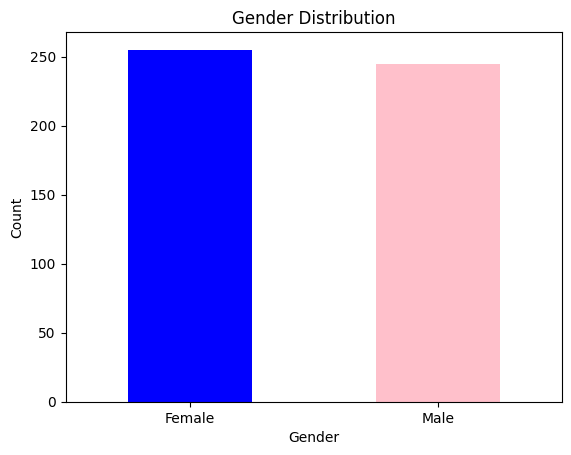

The bar chart for gender distribution has been plotted, showing the count of male vs. female in the dataset.

> Finished chain.


In [25]:
response = agent.invoke("Plot a bar chart for male vs female")

In [26]:
import nltk
from nltk.stem.porter import *

In [27]:
p_stemmer = PorterStemmer()

In [28]:
words = ['run', 'runner', 'running', 'ran', 'runs', 'easily', 'fairly']

In [29]:
for word in words:
    print(f'{word} --> {p_stemmer.stem(word)}')

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


In [31]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language="english")
words = ['run', 'runner', 'running', 'ran', 'runs', 'easily', 'fairly']
for word in words:
    print(f'{word} --> {s_stemmer.stem(word)}')

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

In [3]:
for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

I 	 PRON 	 I
am 	 AUX 	 be
a 	 DET 	 a
runner 	 NOUN 	 runner
running 	 VERB 	 run
in 	 ADP 	 in
a 	 DET 	 a
race 	 NOUN 	 race
because 	 SCONJ 	 because
I 	 PRON 	 I
love 	 VERB 	 love
to 	 PART 	 to
run 	 VERB 	 run
since 	 SCONJ 	 since
I 	 PRON 	 I
ran 	 VERB 	 run
today 	 NOUN 	 today


In [4]:
doc2 = nlp(u"I saw eighteen mice today")

for token in doc2:
    print(token.text, '\t', token.pos_, '\t', token.lemma_)

I 	 PRON 	 I
saw 	 VERB 	 see
eighteen 	 NUM 	 eighteen
mice 	 NOUN 	 mouse
today 	 NOUN 	 today


In [5]:
def show_lemma(doc):
    for token in doc:
        print(token.text, '\t', token.pos_, '\t', token.lemma_)

In [6]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting")

show_lemma(doc3)

I 	 PRON 	 I
am 	 AUX 	 be
meeting 	 VERB 	 meet
him 	 PRON 	 he
tomorrow 	 NOUN 	 tomorrow
at 	 ADP 	 at
the 	 DET 	 the
meeting 	 NOUN 	 meeting


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [8]:
print(nlp.Defaults.stop_words)

{'whereupon', 'behind', 'one', 'less', 'then', 'alone', 'same', 'whereas', 'indeed', 'give', 'hers', '’re', 'twelve', 'say', 'five', '‘d', 'onto', 'anyway', 'between', 'other', 'under', 'since', 'whether', 'nobody', 'twenty', 'rather', 'down', 'and', 'would', 'either', 'else', 'for', 'really', 'such', 'most', 'yourselves', 'herself', 'nevertheless', 'four', 'least', 'becoming', 'but', 'also', 'my', 'doing', 'two', 'what', 'afterwards', 'somewhere', 'nine', 'namely', 'each', 'formerly', 'may', 'there', 'keep', 'in', 'often', 'further', 'so', 'various', 'whereafter', 'the', 'anything', 'hereupon', 'below', '’s', 'hence', 'name', 'yours', 'well', 'meanwhile', 'back', 'themselves', 'whence', 'amount', 'from', 'none', 'thru', "'ll", 'can', 'hereafter', 'ever', 'how', 'something', 'more', 'besides', 'still', 'has', "'m", 'now', 'another', 'sometime', 'several', 'across', 'used', 'some', 'nowhere', 'they', 'me', 'your', 'become', 'neither', 'done', 'throughout', 'n‘t', 'per', 'are', 'ours', '

In [9]:
len(nlp.Defaults.stop_words)

326

In [11]:
nlp.vocab['same'].is_stop

True

In [12]:
nlp.Defaults.stop_words.add('tbh')

In [13]:
len(nlp.Defaults.stop_words)

327